Populating the interactive namespace from numpy and matplotlib


In [1]:
%pylab inline
import os.path as op
import sys
import os

Populating the interactive namespace from numpy and matplotlib


# Problem

The openslide works fine if all the DLL files are located in directory with this script.
Otherwise it is necessary to use hack with changing of `os.environ["PATH"]`. However, `lxml` library is not importable in this case. You can import exclusivelly `lxml` or `openslide`.

The only one sollution is to put DLL files in directory with module.

You cannot have both. The dll `lxml2` used by openslide is different from dll used by lxml. :(


Zkoušel jsem různé kombinace verzí knihoven, patrně je openslide kompilovaný s jinou verzí libxml-2.dll a libintl-8.dll


## Import openslide

In [2]:

pth = op.expanduser(r"~\Downloads\openslide\openslide-win64\bin")
# pth = op.expanduser(r"~\projects\scaffan\devel\knihovny")
# pth = op.expanduser(r"~\Miniconda3\envs\lisa36\Library\bin")
sys.path.insert(0, pth)
orig_PATH = os.environ["PATH"]
os.environ["PATH"] = pth + ";" + os.environ["PATH"]
# ospths = os.environ["PATH"].split(";")
# display(sys.path)
# display(ospths)

### Save list of libs for later use

In [10]:
import glob
pth = op.expanduser(r"~\Downloads\openslide\openslide-win64\bin")
libs_openslide = glob.glob(pth + "\*")
libs_openslide_fn = "libs_openslide.json"
if not op.exists(libs_openslide_fn):
    import json
    with open(libs_openslide_fn, 'w') as outfile:
        json.dump(libs_openslide, outfile)

In [12]:
import glob
pth = op.expanduser(r"~\Miniconda3\envs\lisa36\Library\bin")
libs_conda = glob.glob(pth + "\*")
libs_conda_fn = "libs_conda.json"
if not op.exists(libs_conda_fn):
    import json
    with open(libs_conda_fn, 'w') as outfile:
        json.dump(libs_conda, outfile)

## Import OpenSlde

In [3]:
# import numpy as np
import openslide as opsl

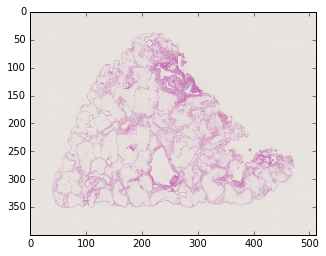

In [4]:
im = opsl.OpenSlide("e:data/scaffold/Hamamatsu/PIG-003_J-18-0165_HE.ndpi")
imthumb = im.get_thumbnail((512, 512))

plt.imshow(imthumb)

## Import lxml 

In [11]:

os.environ["PATH"] = orig_PATH

In [3]:
import lxml
from lxml import etree


In [5]:
dir(lxml)
# from lxml import etree 

# annotation_file = "e:data/scaffold/Hamamatsu/PIG-003_J-18-0165_HE.ndpi.ndpa"
# etree.parse(annotation_file)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_include']

In [6]:
import lxml.etree

ImportError: DLL load failed: Uvedená procedura nebyla nalezena.